<a href="https://colab.research.google.com/github/03Kmj/MicrosoftAI/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests 

In [ ]:
endpoint = 'https://labuser18computervision.cognitiveservices.azure.com/'
key = 'fbf61b700a1f4347903ae8b017f84a81'

In [ ]:
endpoint = endpoint + 'vision/v2.0/'

In [ ]:
analysisEndpoint = endpoint + 'analyze'

In [ ]:
from PIL import Image 
from io import BytesIO

In [ ]:
image_url = 'https://www.sisajournal.com/news/photo/202010/207013_113844_3021.jpg'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

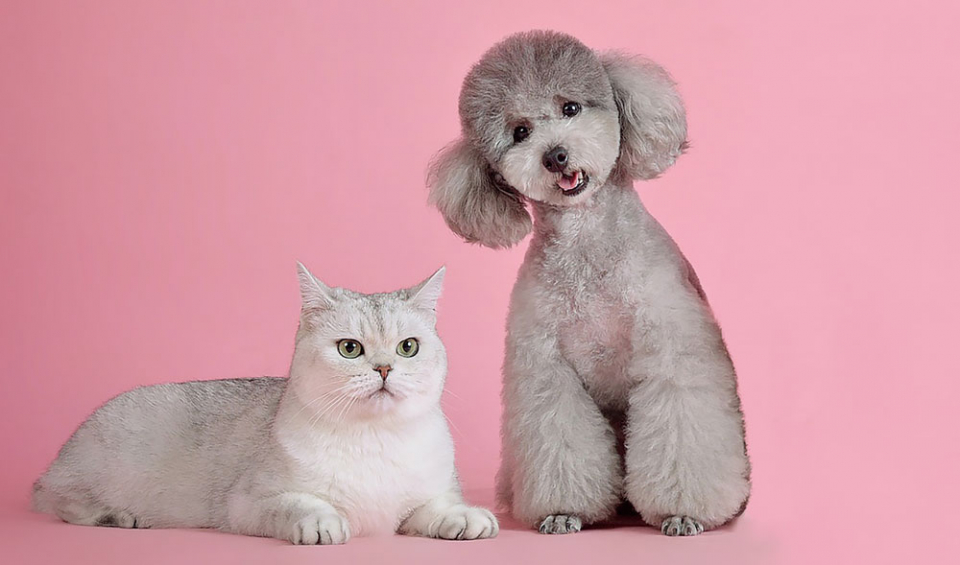

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key':key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [ ]:
response = requests.post(analysisEndpoint, 
                         headers=headers,
                         params=params,
                         json=data)

In [ ]:
result = response.json()
result

{'categories': [],
 'color': {'dominantColorForeground': 'Pink',
  'dominantColorBackground': 'Pink',
  'dominantColors': ['Pink', 'Grey'],
  'accentColor': '9F2C46',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'cat',
   'indoor',
   'mammal',
   'animal',
   'brown',
   'green',
   'table',
   'small',
   'pink',
   'bow',
   'dog',
   'large',
   'bed',
   'grey',
   'laying',
   'blue'],
  'captions': [{'text': 'a cat sitting on a table',
    'confidence': 0.8889311859233081}]},
 'requestId': '408f34b1-1f92-4d32-8fd6-3b83acc415d8',
 'metadata': {'height': 565, 'width': 960, 'format': 'Jpeg'}}

In [ ]:
result['description']['captions'][0]['text']

'a cat sitting on a table'

In [ ]:
detectEndpoint = endpoint + 'detect'

In [ ]:
headers = {'Ocp-Apim-Subscription-key': key}
params = {}
data = {'url':image_url}


In [ ]:
response = requests.post(detectEndpoint,
                         headers = headers,
                         params = params,
                         json = data)

In [ ]:
result = response.json()

In [ ]:
result

{'objects': [{'rectangle': {'x': 437, 'y': 19, 'w': 319, 'h': 522},
   'object': 'poodle',
   'confidence': 0.762,
   'parent': {'object': 'dog',
    'confidence': 0.894,
    'parent': {'object': 'mammal',
     'confidence': 0.917,
     'parent': {'object': 'animal', 'confidence': 0.917}}}},
  {'rectangle': {'x': 29, 'y': 258, 'w': 466, 'h': 289},
   'object': 'cat',
   'confidence': 0.907,
   'parent': {'object': 'mammal',
    'confidence': 0.914,
    'parent': {'object': 'animal', 'confidence': 0.914}}}],
 'requestId': '392265b7-c36f-4129-84e9-55cd955df628',
 'metadata': {'height': 565, 'width': 960, 'format': 'Jpeg'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont

In [ ]:
def MakeRectangle(result):
  objects = result['objects']

  for obj in objects:
    print(obj)

    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)), outline='red')


In [ ]:
draw = ImageDraw.Draw(image)
MakeRectangle(result)

{'rectangle': {'x': 437, 'y': 19, 'w': 319, 'h': 522}, 'object': 'poodle', 'confidence': 0.762, 'parent': {'object': 'dog', 'confidence': 0.894, 'parent': {'object': 'mammal', 'confidence': 0.917, 'parent': {'object': 'animal', 'confidence': 0.917}}}}
{'rectangle': {'x': 29, 'y': 258, 'w': 466, 'h': 289}, 'object': 'cat', 'confidence': 0.907, 'parent': {'object': 'mammal', 'confidence': 0.914, 'parent': {'object': 'animal', 'confidence': 0.914}}}


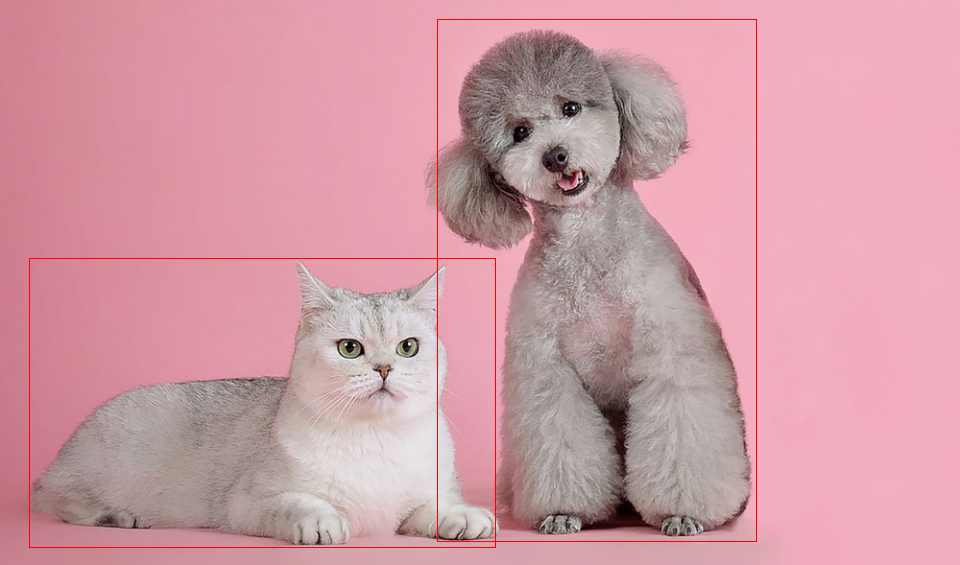

In [ ]:
image